# Investigating The Movie Database Dataset (TMDB)

In [113]:
ddd = pd.read_csv("tmdb-movies.csv")
ddd.

## Introduction

In this project we are gonna investigate on a **TMDB** dataset.**TMDB** dataset contains info about 10,000 movies.
We are gonna follow all the steps in data analysis like Posing questions,data wrangling,data exploring etc.

So,Lets get started with Posing questions.

## Asking Questions

The following are the questions that we are gonna ask before exploring on our data set.

1. What kinds of properties are associated with movies that have high revenues?

## Data wrangling

In [52]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [53]:
# Load the dataset

data = pd.read_csv("tmdb-movies.csv")

In [54]:
#Lets see how our data looks

data.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [55]:
data.shape

(10866, 21)

Hmmm,we see that there are some columns which wont affect our question from answering even if we remove them.So,lets just remove those columns first.

In [56]:
unnecessary_columns = ['imdb_id','original_title','homepage','tagline','overview','keywords','cast','production_companies','revenue_adj','budget_adj']
data.drop(unnecessary_columns,axis = 1,inplace = True)

In [57]:
data.head(1)

,id,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


Well,you may ask, why did we remove cast as it could be a parameter which could affect revenue.Yeah,but the number of movies an actor acted is very less compared to number of movies we are investigating on,so it wont actually have a vast affect.



Also in the above cells output,if you observe we have many gernes for a single movie.It would be more useful if we just made diffent data lines for each genre seperatley.So,lets do that now.

In [58]:
columns_to_be_split = ['genres']

for column in columns_to_be_split:
    
    df = data[column].str.split('|', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:column}).join(data.drop(column,axis = 1), how='left')
    data = df



In [59]:
data.shape

(26960, 11)

In [60]:
data.head(3) # great, it worked

,genres,id,popularity,budget,revenue,director,runtime,release_date,vote_count,vote_average,release_year
0,Action,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
0,Adventure,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
0,Science Fiction,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015


Now,lets see some properties of our dataset,like mean,median and also if there are any missing values,duplicates etc.

In [61]:
sum(data.duplicated()) #We found duplicates.Remove it.

5

In [62]:
# Remove duplicates

data.drop_duplicates(inplace=True)

In [63]:
data.shape #Done.

(26955, 11)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10865
Data columns (total 11 columns):
genres          26955 non-null object
id              26955 non-null int64
popularity      26955 non-null float64
budget          26955 non-null int64
revenue         26955 non-null int64
director        26864 non-null object
runtime         26955 non-null int64
release_date    26955 non-null object
vote_count      26955 non-null int64
vote_average    26955 non-null float64
release_year    26955 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ MB


Lets just remove the rows with missing values as cant fill in directors for those movies.

In [65]:
#drop the rows with missing values

data.dropna(inplace=True)

In [66]:
data.info() #Lets confirm if they are removed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26864 entries, 0 to 10865
Data columns (total 11 columns):
genres          26864 non-null object
id              26864 non-null int64
popularity      26864 non-null float64
budget          26864 non-null int64
revenue         26864 non-null int64
director        26864 non-null object
runtime         26864 non-null int64
release_date    26864 non-null object
vote_count      26864 non-null int64
vote_average    26864 non-null float64
release_year    26864 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ MB


In [67]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,26864.000000,26864.000000,2.686400e+04,2.686400e+04,26864.000000,26864.000000,26864.000000,26864.000000
mean,58440.024903,0.707988,1.756557e+07,4.760272e+07,102.841758,250.782720,5.954370,2000.675886
std,86513.358901,1.116378,3.465316e+07,1.324054e+08,29.800772,638.957858,0.911253,12.770128
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10192.000000,0.225678,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,18129.000000,0.412474,5.000000e+03,0.000000e+00,100.000000,44.000000,6.000000,2005.000000
75%,57961.000000,0.777600,2.000000e+07,3.092569e+07,112.000000,174.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Oh boy! We can see that minimum values for budget,revenue,runtime is 0.That means there might me more too.Lets check how many of them are present.

Also lets check datatypes of our column as we will now work with queries.

In [68]:
df.dtypes

genres           object
id                int64
popularity      float64
budget            int64
revenue           int64
director         object
runtime           int64
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
dtype: object

We can see that datatypes are appropriate.So,its cool.

In [69]:
#Lets see how many values are zeroes for a respective column.

columns_to_be_verified = ["budget","revenue","runtime"]

for column in columns_to_be_verified:
    print(str(column) + " :"  + str(sum(data[column] == 0.0)))

budget :13274
revenue :14204
runtime :55


Okay.We have quite a lot of cells with missing values.We can actually set them to mean value for that column but that would be wrong.

Because there are different genres of a movie and each genres budget,runtime would be different.

So, instead what we could do is,we can fix those values with mean value of the movies of same genre.This would be smart way of doing it.So,lets get to it.

Also dont forget to exclude values with value = 0 while claculating mean.

In [70]:
import numpy as np #Setting a new index which will make us convinient while applying function

data["index"] = np.arange(data.shape[0])
data.set_index("index",inplace=True)

In [71]:
data.head()

,genres,id,popularity,budget,revenue,director,runtime,release_date,vote_count,vote_average,release_year
index,,,,,,,,,,,
0,Action,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
1,Adventure,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
2,Science Fiction,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
3,Thriller,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,6/9/15,5562,6.5,2015
4,Action,76341,28.419936,150000000,378436354,George Miller,120,5/13/15,6185,7.1,2015


In [72]:
data_copy = data

In [73]:
#Lets define our function to fill the zero values in required columns.

column_in_action = ""  # This will keep track which column values are we filling in.

def feed_zero_cells(row):
    
    if row[column_in_action] == 0:
        return data_copy[data_copy[column_in_action]!= 0].groupby("genres").mean().loc[row["genres"]][column_in_action]  # We excluded rows with  values 0 while calculating mean which is important.
    else:
        return row[column_in_action]
        

In [74]:
# Lets store this as new column

columns_to_be_corrected = ['budget','revenue','runtime']

for column in columns_to_be_corrected:
    
    column_in_action = column
    
    data[column + "_new"] = data.apply(feed_zero_cells,axis = 1)

In [75]:
#Lets drop old columns

data = data.drop(columns_to_be_corrected,axis = 1)

In [76]:
# Lets see if we fixed the issue.

data.describe()  #We did it.

,id,popularity,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new
count,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,2.686400e+04,2.686400e+04,26864.000000
mean,58440.024903,0.707988,250.782720,5.954370,2000.675886,3.355211e+07,9.841247e+07,103.050659
std,86513.358901,1.116378,638.957858,0.911253,12.770128,3.174768e+07,1.280499e+08,29.435808
min,5.000000,0.000188,10.000000,1.500000,1960.000000,1.000000e+00,2.000000e+00,2.000000
25%,10192.000000,0.225678,18.000000,5.400000,1994.000000,1.332396e+07,3.356114e+07,90.000000
50%,18129.000000,0.412474,44.000000,6.000000,2005.000000,2.800000e+07,6.974162e+07,100.000000
75%,57961.000000,0.777600,174.000000,6.600000,2011.000000,4.378235e+07,1.337187e+08,112.000000
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.781506e+09,900.000000


In [77]:
#Month could be a useful parameter.So,lets make a column for it.

data['release_month'] = data['release_date'].apply(lambda x : x.strip('/')[0])

In [78]:
data.head(1)

,genres,id,popularity,director,release_date,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new,release_month
index,,,,,,,,,,,,
0,Action,135397,32.985763,Colin Trevorrow,6/9/15,5562,6.5,2015,150000000.0,1.513529e+09,124.0,6


Now that our dataset is clean, we can jump to exploration.

# Exploration

## Research question 1

In [79]:
data.head(1)

,genres,id,popularity,director,release_date,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new,release_month
index,,,,,,,,,,,,
0,Action,135397,32.985763,Colin Trevorrow,6/9/15,5562,6.5,2015,150000000.0,1.513529e+09,124.0,6


In [80]:
#Lets accually see what could considered as high revenue.

data.describe()

,id,popularity,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new
count,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,2.686400e+04,2.686400e+04,26864.000000
mean,58440.024903,0.707988,250.782720,5.954370,2000.675886,3.355211e+07,9.841247e+07,103.050659
std,86513.358901,1.116378,638.957858,0.911253,12.770128,3.174768e+07,1.280499e+08,29.435808
min,5.000000,0.000188,10.000000,1.500000,1960.000000,1.000000e+00,2.000000e+00,2.000000
25%,10192.000000,0.225678,18.000000,5.400000,1994.000000,1.332396e+07,3.356114e+07,90.000000
50%,18129.000000,0.412474,44.000000,6.000000,2005.000000,2.800000e+07,6.974162e+07,100.000000
75%,57961.000000,0.777600,174.000000,6.600000,2011.000000,4.378235e+07,1.337187e+08,112.000000
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.781506e+09,900.000000


Lets mark 75 percentile revenue i.e 1.3e9 as our mark for high revenue.

Basically lets mark each percentile with a particular name.

 ><= 25% as very-low
 
 ><= 50% as low-revenue
 
 >< 75% as average-revenue
 
 > 75% as high-revenue

In [81]:
high_revenue_mark = data.describe()['revenue_new']['75%']  #high reveue mark

In [82]:
def update_revenue_status(row):
    
    if row['revenue_new'] <= data.describe()['revenue_new']['25%']:
        return 'very low'
    elif row['revenue_new'] <= data.describe()['revenue_new']['50%']:
        return 'low'
    elif row['revenue_new'] < data.describe()['revenue_new']['75%']:
        return 'average'
    else:
        return 'high'

In [83]:
data['revenue_status'] = data.apply(update_revenue_status,axis = 1)

In [112]:
data['genres'].unique() #checking our new revenue_status column is present or not.

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

Now lets actually explore only movies with high revenue so that we could know what are the properties it has.

In [86]:
data_high = data[data['revenue_status'] == 'high']

In [87]:
data_high.head(2)

,genres,id,popularity,director,release_date,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new,release_month,revenue_status
index,,,,,,,,,,,,,
0,Action,135397,32.985763,Colin Trevorrow,6/9/15,5562,6.5,2015,150000000.0,1.513529e+09,124.0,6,high
1,Adventure,135397,32.985763,Colin Trevorrow,6/9/15,5562,6.5,2015,150000000.0,1.513529e+09,124.0,6,high


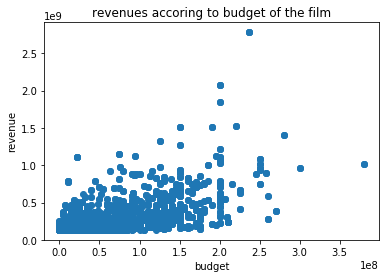

In [88]:
# Lets see how budget is related to revenue

plt.scatter(data_high["budget_new"],data_high["revenue_new"])
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title('revenues accoring to budget of the film')

We see that there a kind of correlation between budget and revenue and it is a positive correlation.Lets try another one.

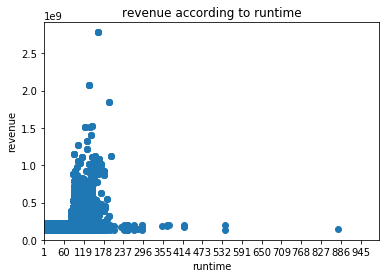

In [101]:
# Lets see how runtime is affecting the revenue.
plt.scatter(data_high["runtime_new"],data_high["revenue_new"])
plt.xlim(1,1000)
plt.xticks(np.arange(1,1000,59))
plt.xlabel("runtime")
plt.ylabel("revenue")
plt.title('revenue according to runtime')

Hmm,seems like people are not liking very short or very long movies.They are just going for an optimum range of [70,180].

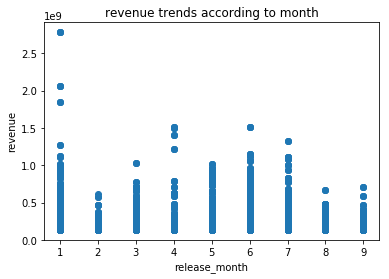

In [102]:
#Lets see if release month is gonna affect revenue.

plt.scatter(data_high["release_month"],data_high["revenue_new"])
plt.xlabel("release_month")
plt.ylabel("revenue")
plt.title('revenue trends according to month')

Hmm,seems like february,august and november are pretty bad months to release movies.The top 3 months giving us best revenues are January,June,July.

In [91]:
#Lets see how genre is gonna affect revenue.

data_grouped_by_genre = data_high.groupby("genres").mean()

In [94]:
data_grouped_by_genre.head()

,id,popularity,vote_count,vote_average,release_year,budget_new,revenue_new,runtime_new
genres,,,,,,,,
Action,65120.707465,0.979814,477.303968,5.725151,2001.150639,5.294773e+07,1.968332e+08,104.047255
Adventure,58567.700738,1.338692,666.043203,5.915595,2000.870390,7.179561e+07,2.811106e+08,106.194352
Animation,72710.984211,0.872328,327.240351,6.443158,2004.549123,6.538790e+07,2.613137e+08,64.977193
Comedy,39639.070769,1.856632,969.529231,6.216615,2004.000000,6.467881e+07,2.813512e+08,103.473846
Crime,33266.907692,2.043365,1316.730769,6.522308,2002.407692,6.845939e+07,2.708124e+08,121.238462


In [95]:
data_grouped_by_genre.shape

(17, 8)

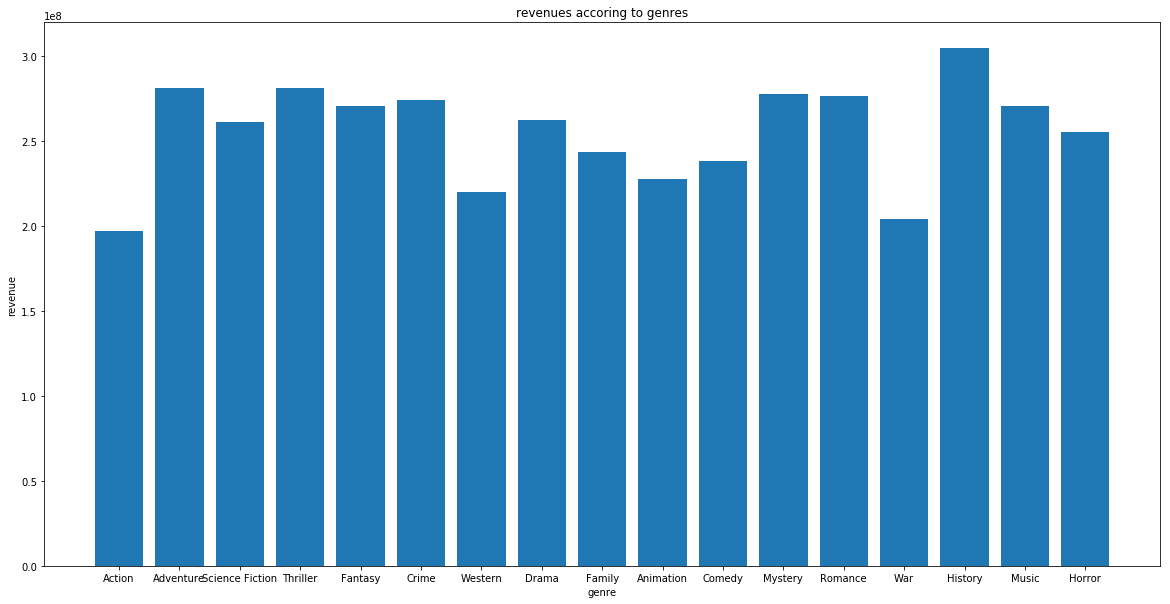

In [96]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(17),data_grouped_by_genre["revenue_new"])
plt.xticks(np.arange(17),data['genres'].unique())
plt.xlabel('genre')
plt.ylabel('revenue')
plt.title("revenues accoring to genres")

Seems like,people are liking Historical movies than any other one.

# Conclusions

So,here let me state some conclusions i made from the data i explored.

From the bar graph above , genre vs revenue , you can observe that movies with genre documentary,Tv Movie and Foriegn dont get high revenues at all.Out of other genres you can see that History is the highest and after that Romance,thriller,adventure,mystery gets the high revenues.

** So genre is one of the property associated with high revenues. **

Next if you look at the runtime vs revenue scatterplot,you can clearly see that most of the high revenue movies have optimum runtime like in range around [60,180].People dont like very long or very short movies.

** So runtime is one of the property associated with high revenues. **

Next lets look at the budget vs revenue scatter plot.You can see that theres a positive correlation.All the points in the graph are movies with high revenue but,of those you can see that the more the budget is the more the revenue is.

** So budget is one of the property associated with high revenues. **

So,these are the three important properties associated with movies with high revenue.



# Limitations

This data was provided with lot of unknown budget values,revenue values.

I filled up those values with mean of those particular property which could actually affect out final conclusions.

Run time as well had some unknown values but that was very less compared to size of the data.So,these are some of the points to keep in mind while executing our final concusion to practical.

**NOTE** : I referred stackoverflow to learn some tricks about data wrangling.